In [256]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [257]:
#size of house
x_train = np.array([1.0, 2.0])
print(x_train)

[1. 2.]


In [258]:
#prices
y_train = np.array([300, 500])
print(y_train)

[300 500]


In [259]:
#size of training set
m = x_train.shape
print(m)

(2,)


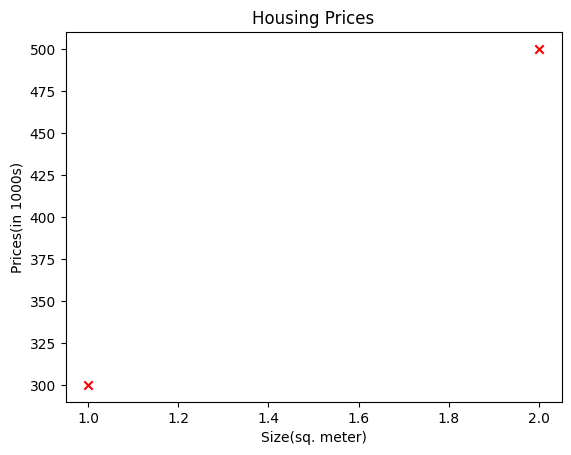

In [260]:
#Plotting the data set
plt.scatter(x_train, y_train, marker="x", c="r")

#Title of plot
plt.title("Housing Prices")

plt.xlabel("Size(sq. meter)")

plt.ylabel("Prices(in 1000s)")

plt.show()

## Model function


In [261]:
#f(x) = wx + b
w = 100
b = 100

def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = (w*x[i]) + b
    return f_wb

[200. 300.]


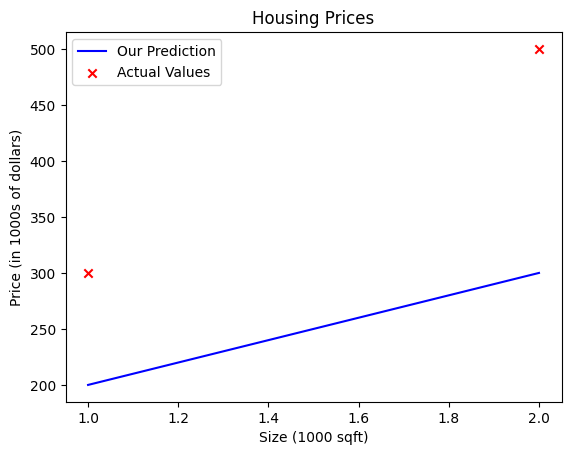

In [262]:
tmp_fwb = compute_model_output(x_train, w, b)
print(tmp_fwb)

plt.plot(x_train, tmp_fwb, c='b', label = "Our Prediction")
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

## Cost of Model

In [263]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    j = 0.0
    for i in range(m):
        j = j +(((w*x[i]+b)-y[i])**2)
    cost = j/(2*m)
    return cost

In [264]:
j_wb = compute_cost(x_train, y_train, w, b)
print(j_wb)

12500.0


## Implement Gradient Descent

In [265]:
def compute_gradient(w, b, x, y, m):
    d_dw = 0.0
    d_db = 0.0
    for i in range(m):
        d_dw_i = x[i]*(((w*x[i])+b) - y[i])
        d_dw = d_dw + d_dw_i

        d_db_i = ((w*x[i])+b) - y[i]
        d_db = d_db + d_db_i

    d_dw = d_dw_i/m
    d_db = d_db_i/m
    return d_db, d_dw

In [266]:
def gradient_descent(x, y, w, b, alpha, num_iters, gradient_function, cost_function):

    j_hist = []
    i_hist = []
    m = x.shape[0]

    for i in range(num_iters):
        db, dw = gradient_function(w, b, x, y, m)

        tmp_w = w-(alpha*dw)
        tmp_b = b-(alpha*db)

        w = tmp_w
        b = tmp_b

        if i<10000:
            j_hist.append(cost_function(x, y, w, b))
            i_hist.append([w,b])

        if i% math.ceil(num_iters/10)==0:
            print(f"Iteration: {i}, Cost: {j_hist[-1]:.4f}, dj_dw: {dw}, dj_db: {db}, w: {w}, b: {b}")

    return j_hist, i_hist, w, b

In [267]:
w = 0
b = 0
iterations = 400

alpha = 0.01

J_hist, p_hist, w_final, b_final = gradient_descent(x_train, y_train, w, b, alpha, iterations, compute_gradient, compute_cost)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration: 0, Cost: 80803.1250, dj_dw: -500.0, dj_db: -250.0, w: 5.0, b: 2.5
Iteration: 40, Cost: 10660.9870, dj_dw: -181.61621994394022, dj_db: -90.80810997197011, w: 129.1696742218633, b: 64.58483711093164
Iteration: 80, Cost: 1406.5872, dj_dw: -65.9689026934513, dj_db: -32.98445134672565, w: 174.27212794955398, b: 87.13606397477699
Iteration: 120, Cost: 185.5820, dj_dw: -23.96204548206839, dj_db: -11.981022741034195, w: 190.65480226199332, b: 95.32740113099666
Iteration: 160, Cost: 24.4853, dj_dw: -8.70379224515625, dj_db: -4.351896122578125, w: 196.60552102438908, b: 98.30276051219454
Iteration: 200, Cost: 3.2305, dj_dw: -3.161499693485382, dj_db: -1.580749846742691, w: 198.7670151195407, b: 99.38350755977035
Iteration: 240, Cost: 0.4262, dj_dw: -1.1483592473696262, dj_db: -0.5741796236848131, w: 199.55213989352583, b: 99.77606994676292
Iteration: 280, Cost: 0.0562, dj_dw: -0.41712133128987716, dj_db: -0.20856066564493858, w: 199.83732268079694, b: 99.91866134039847
Iteration: 320,